In [25]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
%matplotlib inline

In [2]:
ltc_requests = requests.get("http://publicreporting.ltchomes.net/en-ca/Search_Selection.aspx")
ltc = BeautifulSoup(ltc_requests.text)

In [ ]:
# ltc_requests.status_code
# ltc_requests.reason
# print(ltc_requests.request.headers)
# ltc_requests.headers

## Webscrape list of LTC home names and links to detailed info

In [3]:
# webscrape list of ltc home names and links
ordered_lists = ltc.find_all("ol")
ltc_list = ordered_lists[1]
home = ltc_list.find_all("a", {"class":"rsLink"})

In [4]:
# create lists of names and links
names = []
links = []
for each in home:
    names.append(each.getText())
    links.append(each.get('href'))

In [5]:
# there are 651 records which is correct
print(len(home), len(names), len(links))

# we see that the names are all unique
print(len(set(names)), len(set(links)))

651 651 651
651 651


In [6]:
# modify links list to full url
full_links = []
for i in range(len(links)):
    full_links.append('http://publicreporting.ltchomes.net/en-ca/' + links[i])

## Webscrape detailed profile info for each LTC home

In [8]:
# iterate through each of the links and scrape characteristics of ltc homes
addresses = []
cities_postalcodes = []
LHIN = []
licensee = []
management = []
home_type = []
beds = []
short_stay = []
residents_council = []
family_council = []
accreditation = []
info = []
counter = -1
for each in full_links:
    counter += 1
#     print(counter)
    soup = requests.get(each)
    soup = BeautifulSoup(soup.text)
    addresses.append(soup.find("div", {"id":"ctl00_ContentPlaceHolder1_divHomeAddress"}).getText())
    cities_postalcodes.append(soup.find("div", {"id":"ctl00_ContentPlaceHolder1_divHomeCity"}).getText())
    profiles = soup.find("div", {"id":"ctl00_ContentPlaceHolder1_divHomeProfile_item_Col1"})
    profile_data = profiles.find_all("div", {"class":"Profilerow_col2"})
    try:    
        LHIN.append(profile_data[0].getText())
        licensee.append(profile_data[3].getText())
        management.append(profile_data[4].getText())
        home_type.append(profile_data[5].getText())
        beds.append(profile_data[6].getText())
        short_stay.append(profile_data[7].getText())
        residents_council.append(profile_data[8].getText())
        family_council.append(profile_data[9].getText())
        accreditation.append(profile_data[10].getText())
        info.append(profile_data[12].getText())
     
    except:
        print(counter) # print out records which resulted in error
        LHIN.append(None)
        licensee.append(None)
        management.append(None)
        home_type.append(None)
        beds.append(None)
        short_stay.append(None)
        residents_council.append(None)
        family_council.append(None)
        accreditation.append(None)
        info.append(None)

324
508


### Two homes do not have profile info

In [9]:
# print out links to LTC homes for which an error was raised during webscraping
print(full_links[324]) # LENNOX AND ADDINGTON COUNTY GENERAL HOSPITAL
print(full_links[508]) # ST. JOSEPH'S MOTHER HOUSE (MARTHA WING)

http://publicreporting.ltchomes.net/en-ca/homeprofile.aspx?Home=7089
http://publicreporting.ltchomes.net/en-ca/homeprofile.aspx?Home=C604


In [10]:
# create a df of Ontario LTC homes
df = pd.DataFrame({'name':names, 
                   'address':addresses, 
                   'city and postal code':cities_postalcodes, 
                   'LHIN':LHIN, 
                   'licensee':licensee, 
                   'management':management, 
                   'home type':home_type, 
                   'beds':beds, 
                   'short stay':short_stay, 
                   'residents council':residents_council, 
                   'family council':family_council, 
                   'accreditation':accreditation, 
                   'additional_info':info})
df.info()
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 13 columns):
name                    651 non-null object
address                 651 non-null object
city and postal code    651 non-null object
LHIN                    649 non-null object
licensee                649 non-null object
management              649 non-null object
home type               649 non-null object
beds                    649 non-null object
short stay              649 non-null object
residents council       649 non-null object
family council          649 non-null object
accreditation           649 non-null object
additional_info         649 non-null object
dtypes: object(13)
memory usage: 66.2+ KB


,name,address,city and postal code,LHIN,licensee,management,home type,beds,short stay,residents council,family council,accreditation,additional_info
0,AFTON PARK PLACE LONG TERM CARE COMMUNITY,1200 Afton Drive,"Sarnia, N7S6L6",Erie St. Clair,S & R Nursing Homes Ltd.,,For-Profit,Home with approximately 128 beds,No,Yes,Yes,Yes,
1,"ALBRIGHT GARDENS HOMES, INCORPORATED",5050 Hillside Drive,"Beamsville, L0R1B2",Hamilton Niagara Haldimand Brant (Hnhb),"Albright Gardens Homes, Incorporated",,Non-Profit,Home with approximately 231 beds,No,Yes,Yes,No,
2,ALEXANDER PLACE,329 Parkside Drive P. O. Box 50,"Waterdown, L0R2H0",Hamilton Niagara Haldimand Brant (Hnhb),Waterdown Long Term Care Centre Inc.,,For-Profit,Home with approximately 128 beds,Yes,Yes,Yes,Yes,
3,ALGOMA DISTRICT HOMES FOR THE AGED (ALGOMA MANOR),135 Dawson Street,"Thessalon, P0R1L0",North East,Board Of Management For The District Of Algoma,,,Home with approximately 108 beds,Yes,Yes,Yes,No,Home Closed on 11/01/2011
4,ALGOMA MANOR NURSING HOME,145 Dawson Street,"Thessalon, P0R1L0",North East,Algoma Manor Nursing Home,,,Home with approximately 96 beds,Yes,Yes,Yes,Yes,
5,ALGONQUIN NURSING HOME,207 Turcotte Park Road P.O. Box 270,"Mattawa, P0H1V0",North East,Algonquin Nursing Home Of Mattawa,Hôpital De Mattawa Hospital,Non-Profit,Home with approximately 73 beds,Yes,Yes,Yes,Yes,
6,ALLENDALE,185 Ontario Street South,"Milton, L9T2M4",Mississauga Halton,The Regional Municipality Of Halton,,Municipal,Home with approximately 200 beds,No,Yes,Yes,Yes,
7,ALMONTE COUNTRY HAVEN,333 Country Street P.O. Box 250,"Almonte, K0A1A0",Champlain,0760444 B.C. Ltd. As General Partner On Behalf...,,For-Profit,Home with approximately 82 beds,No,Yes,Yes,Yes,
8,ALTAMONT CARE COMMUNITY,92 Island Road,"Scarborough, M1C2P5",Central East,Vigour Limited Partnership On Behalf Of Vigour...,,For-Profit,Home with approximately 159 beds,Yes,Yes,Yes,Yes,
9,ANSON PLACE CARE CENTRE,85 Main Street North,"Hagersville, N0A1H0",Hamilton Niagara Haldimand Brant (Hnhb),Rykka Care Centres Lp,,For-Profit,Home with approximately 61 beds,Yes,Yes,No,Yes,


In [11]:
# split the 'city and postal code' column into 2 columns 'city' and 'postal code'
df['city'] = df['city and postal code'].str.split(',').str[0]
df['postal code'] = df['city and postal code'].str.split(',').str[1]

# use regex to extract the number of beds to a different column
df['number of beds'] = df['beds'].str.extract(r'(\d+)', expand=False)

df.head(20)
df.nunique()

name                    651
address                 648
city and postal code    624
LHIN                     14
licensee                378
management               26
home type                 4
beds                    211
short stay                2
residents council         2
family council            2
accreditation             2
additional_info          24
city                    268
postal code             621
number of beds          211
dtype: int64

In [12]:
# print out LTC homes with duplicate addresses
df[df.duplicated(['address'], keep=False)]

,name,address,city and postal code,LHIN,licensee,management,home type,beds,short stay,residents council,family council,accreditation,additional_info,city,postal code,number of beds
78,CEDARWOOD LODGE,860 Great Northern Road,"Sault Ste. Marie, P6A5K7",North East,Autumnwood Mature Lifestyle Communities Inc.,Universalcare Canada Inc.,For-Profit,Home with approximately 50 beds,No,Yes,Yes,No,,Sault Ste. Marie,P6A5K7,50
211,FOUNTAIN VIEW CARE COMMUNITY,1800 O'Connor Drive,"East York, M4A1W7",Toronto Central,2063414 Ontario Limited As General Partner Of ...,,For-Profit,Home with approximately 158 beds,No,Yes,Yes,Yes,,East York,M4A1W7,158
246,GREAT NORTHERN NURSING CENTRE,860 Great Northern Road,"Sault Ste Marie, P6A5K7",North East,Extendicare (Canada) Inc.,Extendicare (Canada) Inc.,For-Profit,Home with approximately 95 beds,No,Yes,Yes,No,HOME CLOSED on 04/19/2013,Sault Ste Marie,P6A5K7,95
257,HARMONY HILLS CARE COMMUNITY,1800 O'Connor Drive,"Toronto, M4A1W7",Toronto Central,2063414 Ontario Limited As General Partner Of ...,,For-Profit,Home with approximately 160 beds,No,Yes,Yes,Yes,,Toronto,M4A1W7,160
309,LAKELAND LONG TERM CARE (ELDCAP),6 Albert Street,"Parry Sound, P2A3A4",North East,West Parry Sound Health Centre,,Non-Profit,Home with approximately 20 beds,No,No,No,No,,Parry Sound,P2A3A4,20
310,LAKELAND LONG TERM CARE SERVICES,6 Albert Street,"Parry Sound, P2A3A4",North East,Lakeland Long Term Care Services Corporation,,Non-Profit,Home with approximately 90 beds,No,Yes,No,No,,Parry Sound,P2A3A4,90


### Manual review of 3 duplicated addresses involving 6 homes
- Cedarwood: no website
- Great Northern: home closed in 2013
- Lakeland Eldcap: no website, seems to be connected to Lakeland LTC
- Lakeland LTC: http://www.lakelandltc.com/, owned and connected to WPSHC which is a hospital
- Harmony: https://www.siennaliving.ca/long-term-care/ontario/harmony-hills-care-community, last inspection Feb 2020
- Fountain: https://www.siennaliving.ca/long-term-care/ontario/fountain-view-care-community, last inspection Oct 2019


## Webscrape inspections info for each LTC home

In [13]:
# modify links to access inspection data 
full_links_inspection = [each + '&tab=1' for each in full_links]
    

In [14]:
# webscrape inspection data for each ltc home 
frames = []
counter = -1
for each in full_links_inspection:
    inspection_types = []
    inspection_dates = []
#     counter += 1
#     print(counter)
    soup = requests.get(each)
    soup = BeautifulSoup(soup.text)
    name = soup.find("div", {"class":"HomeName"}).getText()
    inspections = soup.find("div", {"id":"ctl00_ContentPlaceHolder1_divHomeProfile_item_Col3"})
    types = inspections.find_all("div", {"class":"divInspectionTypeDataCol"})
    number_of_types = len(types)
    for each in types:
        inspection_types.append(each.getText())
    dates = inspections.find_all("div", {"class":"divInspectionDateDataCol"})
    number_of_dates = len(dates)
    for each in dates:
        inspection_dates.append(each.getText())
    df_temp = pd.DataFrame({"name": name, 
                            "inspection_types":inspection_types, 
                            "number_of_types":number_of_types, 
                            "inspection_dates":inspection_dates, 
                            "number_of_dates":number_of_dates})
    frames.append(df_temp)
    

### Create a df of raw inspection data

In [15]:
# create a df of inspection data
df2 = pd.concat(frames)
print(df2.nunique()) # there are only 648 unique LTC home names
df2.info()

# display data for first 2 ltc homes
pd.set_option('display.max_rows', None)
df2.head(10)

name                 648
inspection_types      29
number_of_types      102
inspection_dates    2548
number_of_dates      102
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 25
Data columns (total 5 columns):
name                23565 non-null object
inspection_types    23565 non-null object
number_of_types     23565 non-null int64
inspection_dates    23565 non-null object
number_of_dates     23565 non-null int64
dtypes: int64(2), object(3)
memory usage: 1.1+ MB


,name,inspection_types,number_of_types,inspection_dates,number_of_dates
0,AFTON PARK PLACE LONG TERM CARE COMMUNITY,Complaints Inspection,67,"Jan 17, 2020",67
1,AFTON PARK PLACE LONG TERM CARE COMMUNITY,Complaints Inspection,67,"Nov 27, 2019",67
2,AFTON PARK PLACE LONG TERM CARE COMMUNITY,Critical Incident Inspection,67,"Nov 27, 2019",67
3,AFTON PARK PLACE LONG TERM CARE COMMUNITY,Critical Incident Inspection,67,"Oct 28, 2019",67
4,AFTON PARK PLACE LONG TERM CARE COMMUNITY,Critical Incident Inspection,67,"May 01, 2019",67
5,AFTON PARK PLACE LONG TERM CARE COMMUNITY,Complaints Inspection,67,"Mar 28, 2019",67
6,AFTON PARK PLACE LONG TERM CARE COMMUNITY,Critical Incident Inspection,67,"Mar 06, 2019",67
7,AFTON PARK PLACE LONG TERM CARE COMMUNITY,Resident Quality Inspection,67,"Aug 02, 2018",67
8,AFTON PARK PLACE LONG TERM CARE COMMUNITY,Critical Incident Inspection,67,"Feb 02, 2018",67
9,AFTON PARK PLACE LONG TERM CARE COMMUNITY,Resident Quality Inspection,67,"Jun 26, 2017",67


In [16]:
# convert date column into date datatype
df2['inspection_dates'] = pd.to_datetime(df2['inspection_dates'])

In [17]:
# list 29 different inspection types
df2['inspection_types'].value_counts()

Complaints Inspection                                                        8006
Critical Incident Inspection                                                 6615
Follow-Up Inspection                                                         1846
Resident Quality Inspection                                                  1810
Resident Quality Inspection with Order(s) of the Inspector                   1283
Critical Incident Inspection  with Order(s) of the Inspector                  987
Complaints Inspection  with Order(s) of the Inspector                         969
Follow-Up Inspection with Order(s) of the Inspector                           806
Other Inspection                                                              350
Complaints Inspection (En français)                                           188
Critical Incident Inspection (En français)                                    181
Mandatory Inspection                                                          103
Other Inspection

In [18]:
# Return LTC home names that do not match with original list of names
orig = set(df['name'])
inspec = set(df2['name'])
def returnNotMatches(a, b):
    return [[x for x in a if x not in b], [x for x in b if x not in a]]
returnNotMatches(orig, inspec)

[['NORTHUMBERLAND HILLS HOSPITAL',
  "ST. JOSEPH'S MOTHER HOUSE (MARTHA WING)",
  'MARIANHILL - MARGUERITE CENTRE'],
 []]

### Manual review of 3 LTC homes that were not represented in the inspections data
- ST. JOSEPH'S MOTHER HOUSE (MARTHA WING), no inspections or profile information
- NORTHUMBERLAND HILLS HOSPITAL: No inspections, closed 2012
- MARIANHILL - MARGUERITE CENTRE: No inspections, closed 2012


## Examine number of inspections for each LTC home

In [19]:
# create a df with total number of inspections
df2_count = df2.groupby(['name']).size().to_frame('total_inspections').reset_index()
df2_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 2 columns):
name                 648 non-null object
total_inspections    648 non-null int64
dtypes: int64(1), object(1)
memory usage: 10.2+ KB


(0.0, 21.0]      174
(21.0, 31.0]     163
(46.0, 172.0]    160
(31.0, 46.0]     151
Name: quartiles_total_range, dtype: int64


,name,total_inspections,quartiles_total_range,quartiles_total_rank
0,AFTON PARK PLACE LONG TERM CARE COMMUNITY,67,"(46.0, 172.0]",3
1,"ALBRIGHT GARDENS HOMES, INCORPORATED",39,"(31.0, 46.0]",2
2,ALEXANDER PLACE,28,"(21.0, 31.0]",1
3,ALGOMA DISTRICT HOMES FOR THE AGED (ALGOMA MANOR),5,"(0.0, 21.0]",0
4,ALGOMA MANOR NURSING HOME,23,"(21.0, 31.0]",1


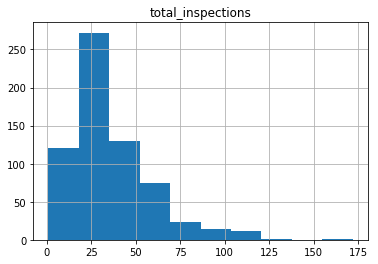

In [29]:
# plot a histogram of total inspections to see how the number of inspections are distributed
df2_count.hist(column='total_inspections')

# cut total inspections into quartiles and add a column with quartile ranges
df2_count['quartiles_total_range'] = pd.qcut(df2_count['total_inspections'], q=4, precision=0)
print(df2_count['quartiles_total_range'].value_counts())

# add column with quartile rank values
df2_count['quartiles_total_rank'] = pd.qcut(df2_count['total_inspections'], q=4, labels = False, precision=0)

df2_count.head()

In [20]:
# filter df2 and keep only rows with inspections since Jan 2015 inclusive (inspections in the last 5 years)
df3 = df2[(df2['inspection_dates'] > '2015-01-01')]
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12213 entries, 0 to 15
Data columns (total 5 columns):
name                12213 non-null object
inspection_types    12213 non-null object
number_of_types     12213 non-null int64
inspection_dates    12213 non-null datetime64[ns]
number_of_dates     12213 non-null int64
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 572.5+ KB


(0.0, 11.0]     165
(16.0, 23.0]    158
(11.0, 16.0]    155
(23.0, 86.0]    154
Name: quartiles_5y_range, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 632 entries, AFTON PARK PLACE LONG TERM CARE COMMUNITY to ÉLISABETH-BRUYÈRE RESIDENCE
Data columns (total 3 columns):
5y_inspections        632 non-null int64
quartiles_5y_range    632 non-null category
quartiles_5y_rank     632 non-null int64
dtypes: category(1), int64(2)
memory usage: 15.5+ KB


,5y_inspections,quartiles_5y_range,quartiles_5y_rank
name,,,
AFTON PARK PLACE LONG TERM CARE COMMUNITY,34,"(23.0, 86.0]",3
"ALBRIGHT GARDENS HOMES, INCORPORATED",25,"(23.0, 86.0]",3
ALEXANDER PLACE,17,"(16.0, 23.0]",2
ALGOMA MANOR NURSING HOME,14,"(11.0, 16.0]",1
ALGONQUIN NURSING HOME,14,"(11.0, 16.0]",1


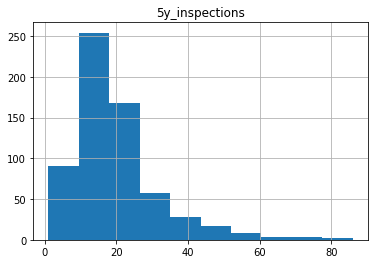

In [30]:
# create df with number of inspections in the last 5 years
df3_count = df3.groupby(['name']).size().to_frame('5y_inspections')

# plot a histogram of 5y inspections to see how the number of inspections are distributed
df3_count.hist(column='5y_inspections')

# cut total inspections into quartiles and add a column with quartile ranges
df3_count['quartiles_5y_range'] = pd.qcut(df3_count['5y_inspections'], q=4, precision=0)
print(df3_count['quartiles_5y_range'].value_counts())

# add column with quartile rank values
df3_count['quartiles_5y_rank'] = pd.qcut(df3_count['5y_inspections'], q=4, labels = False, precision=0)

df3_count.info()
df3_count.head()


In [31]:
# filter df2 and keep only rows with inspections since Jan 2018 inclusive (inspections in the last 2 years)
df4 = df2[(df2['inspection_dates'] > '2018-01-01')]
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5528 entries, 0 to 7
Data columns (total 5 columns):
name                5528 non-null object
inspection_types    5528 non-null object
number_of_types     5528 non-null int64
inspection_dates    5528 non-null datetime64[ns]
number_of_dates     5528 non-null int64
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 259.1+ KB


(0.0, 5.0]      188
(7.0, 11.0]     169
(11.0, 44.0]    142
(5.0, 7.0]      127
Name: quartiles_2y_range, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 626 entries, AFTON PARK PLACE LONG TERM CARE COMMUNITY to ÉLISABETH-BRUYÈRE RESIDENCE
Data columns (total 3 columns):
2y_inspections        626 non-null int64
quartiles_2y_range    626 non-null category
quartiles_2y_rank     626 non-null int64
dtypes: category(1), int64(2)
memory usage: 15.3+ KB


,2y_inspections,quartiles_2y_range,quartiles_2y_rank
name,,,
AFTON PARK PLACE LONG TERM CARE COMMUNITY,9,"(7.0, 11.0]",2
"ALBRIGHT GARDENS HOMES, INCORPORATED",15,"(11.0, 44.0]",3
ALEXANDER PLACE,8,"(7.0, 11.0]",2
ALGOMA MANOR NURSING HOME,7,"(5.0, 7.0]",1
ALGONQUIN NURSING HOME,5,"(0.0, 5.0]",0


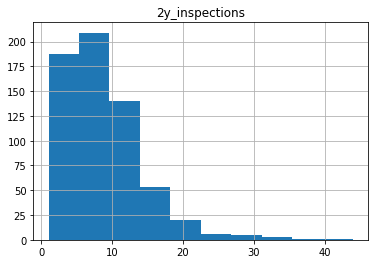

In [33]:
# create df with number of inspections in the last 2 years
df4_count = df4.groupby(['name']).size().to_frame('2y_inspections')

# plot a histogram of 5y inspections to see how the number of inspections are distributed
df4_count.hist(column='2y_inspections')

# cut total inspections into quartiles and add a column with quartile ranges
df4_count['quartiles_2y_range'] = pd.qcut(df4_count['2y_inspections'], q=4, precision=0)
print(df4_count['quartiles_2y_range'].value_counts())

# add column with quartile rank values
df4_count['quartiles_2y_rank'] = pd.qcut(df4_count['2y_inspections'], q=4, labels = False, precision=0)

df4_count.info()
df4_count.head()

In [35]:
# merge dfs to create dataframe of LTC homes and number of inspections
df_merged23 = pd.merge(left=df2_count, right=df3_count, how='outer', left_on='name', right_on='name')
df_inspections = pd.merge(left=df_merged23, right=df4_count, how='outer', left_on='name', right_on='name')

# fill all NaN values with 0
# df_inspections = df_inspections.fillna(0)

df_inspections.info() # 5y and 2y inspections col is now float datatype?






<class 'pandas.core.frame.DataFrame'>
Int64Index: 648 entries, 0 to 647
Data columns (total 10 columns):
name                     648 non-null object
total_inspections        648 non-null int64
quartiles_total_range    648 non-null category
quartiles_total_rank     648 non-null int64
5y_inspections           632 non-null float64
quartiles_5y_range       632 non-null category
quartiles_5y_rank        632 non-null float64
2y_inspections           626 non-null float64
quartiles_2y_range       626 non-null category
quartiles_2y_rank        626 non-null float64
dtypes: category(3), float64(4), int64(2), object(1)
memory usage: 42.6+ KB


### Note that there are fewer homes with inspections in the last 5y/2y meaning that some homes have not been inspected in the last 2-5 years. Some homes may be closed as these have not yet been filtered out. 

## Export final dataframe with LTC profile and inspections info

In [36]:
# merge main ltc df with inspection counts df
df_final = pd.merge(left=df, right=df_inspections, how='left', left_on='name', right_on='name')
df_final.info()

# export final df as csv
df_final.to_csv(r'df_final_ngan.csv', index = False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 0 to 650
Data columns (total 25 columns):
name                     651 non-null object
address                  651 non-null object
city and postal code     651 non-null object
LHIN                     649 non-null object
licensee                 649 non-null object
management               649 non-null object
home type                649 non-null object
beds                     649 non-null object
short stay               649 non-null object
residents council        649 non-null object
family council           649 non-null object
accreditation            649 non-null object
additional_info          649 non-null object
city                     651 non-null object
postal code              651 non-null object
number of beds           649 non-null object
total_inspections        648 non-null float64
quartiles_total_range    648 non-null category
quartiles_total_rank     648 non-null float64
5y_inspections           632 non-nul

In [ ]:
# test scripts by scraping a single ltc site

# scrape profile data
# soup = requests.get(
# "http://publicreporting.ltchomes.net/en-ca/homeprofile.aspx?Home=2872") 
# soup = BeautifulSoup(soup.text)

# address = soup.find("div", {"id":"ctl00_ContentPlaceHolder1_divHomeAddress"}).getText()
# city = soup.find("div", {"id":"ctl00_ContentPlaceHolder1_divHomeCity"}).getText()
# profiles = soup.find("div", {"id":"ctl00_ContentPlaceHolder1_divHomeProfile_item_Col1"})
# profile_data = profiles.find_all("div", {"class":"Profilerow_col2"})
# profile_data
# LHIN = profile_data[0].getText()
# LHIN

# # scrape inspections data
# soup = requests.get(
# "http://publicreporting.ltchomes.net/en-ca/homeprofile.aspx?Home=2872&tab=1") # add "&tab=1" to url
# soup = BeautifulSoup(soup.text)

# inspections = soup.find("div", {"id":"ctl00_ContentPlaceHolder1_divHomeProfile_item_Col3"})
# inspection_types = inspections.find_all("div", {"class":"divInspectionTypeDataCol"})
# inspection_dates = inspections.find_all("div", {"class":"divInspectionDateDataCol"})

# print(len(inspection_types))
# print(len(inspection_dates))

In [ ]:
# a = []
# for each in inspection_types:
#     a.append(each.getText())
# a